<a href="https://colab.research.google.com/github/oAhmed990o/bilateral-filter-image-cartoonifying/blob/main/Cartoonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [315]:
import os,sys
from google.colab import drive

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/my_colab_notebooks")
sys.path.append("/content/drive/My Drive/my_colab_notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


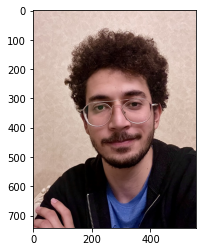

In [336]:
img = cv2.imread('/content/drive/My Drive/my_colab_notebooks/me.jpg') 
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)

In [473]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median_img = cv2.medianBlur(gray_img, 3)
laplacian_img = cv2.Laplacian(median_img, cv2.CV_16U, ksize=3)
edge_img = np.uint8(np.absolute(laplacian_img))
T, edge_img = cv2.threshold(edge_img, 50, 255, cv2.THRESH_BINARY_INV)

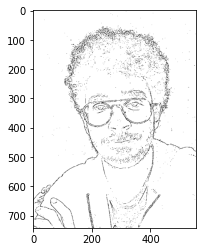

In [474]:
plt.imshow(edge_img, cmap='gray', vmin=0, vmax=255)

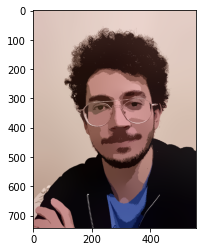

In [371]:
bilateral = cv2.bilateralFilter(color_img,20,20,20)
for i in range(100):
  bilateral = cv2.bilateralFilter(bilateral,20,20,20)

plt.imshow(bilateral)

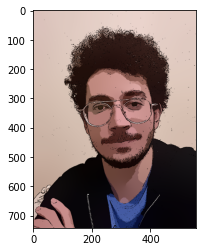

In [475]:
_edge_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2RGB)
final_img = cv2.bitwise_and(_edge_img,bilateral, mask=edge_img)
plt.imshow(final_img)

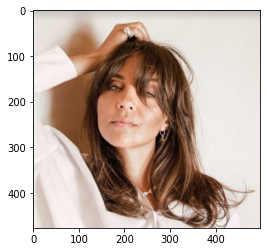

In [461]:
roro_img = cv2.imread('/content/drive/My Drive/my_colab_notebooks/roro.png') 
roro_color_img = cv2.cvtColor(roro_img, cv2.COLOR_BGR2RGB)
plt.imshow(roro_color_img)

In [471]:
roro_gray_img = cv2.cvtColor(roro_img, cv2.COLOR_BGR2GRAY)
roro_median_img = cv2.medianBlur(roro_gray_img, 3)
roro_laplacian_img = cv2.Laplacian(roro_median_img, cv2.CV_8U, ksize=3)
roro_edge_img = np.uint8(np.absolute(roro_laplacian_img))
R, roro_edge_img = cv2.threshold(roro_edge_img, 50, 255, cv2.THRESH_BINARY_INV)

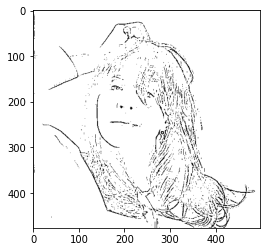

In [472]:
plt.imshow(roro_edge_img, cmap='gray')

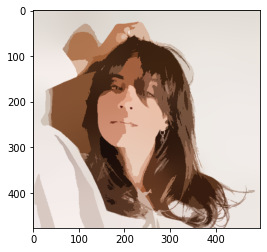

In [464]:
roro_bilateral = cv2.bilateralFilter(roro_color_img,20,20,20)
for i in range(100):
  roro_bilateral = cv2.bilateralFilter(roro_bilateral,20,20,20)

plt.imshow(roro_bilateral)

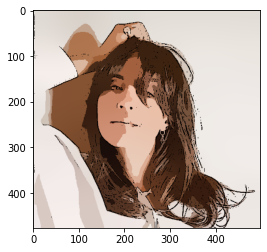

In [468]:
_roro_edge_img = cv2.cvtColor(roro_edge_img, cv2.COLOR_GRAY2RGB)
roro_final_img = cv2.bitwise_and(_roro_edge_img,roro_bilateral)
plt.imshow(roro_final_img)